In [1]:
from mps_utils import * 
from wave_circuit import * 
import matplotlib.pyplot as plt 

In [2]:
f1 = lambda x :  np.exp(-(x-0.45)**2/0.01)
df1 = lambda x: ( -2 * (x-0.45)/(0.01) ) * f1(x)

f2 = lambda x :  (x-0.45)/0.05 * f1(x)
df2 = lambda x: (x-0.45)/0.05 * df1(x) + 1/0.05 * f1(x)

f3 = lambda x: (1-(x-0.45)**2/0.01) * f1(x)
df3 = lambda x: -2*(x-0.45)/0.01 * f1(x) + (1-(x-0.45)**2/0.01)*df1(x)

m = 5
l = 2**m
x_coarse = np.linspace(0,1,l+1)

In [3]:
p1 = get_polys(x_coarse,f1,df1)
p2 = get_polys(x_coarse,f2,df2)
p3 = get_polys(x_coarse,f3,df3)

def apply(p,x):
    return np.dot(p,[x**i for i in range(len(p))])

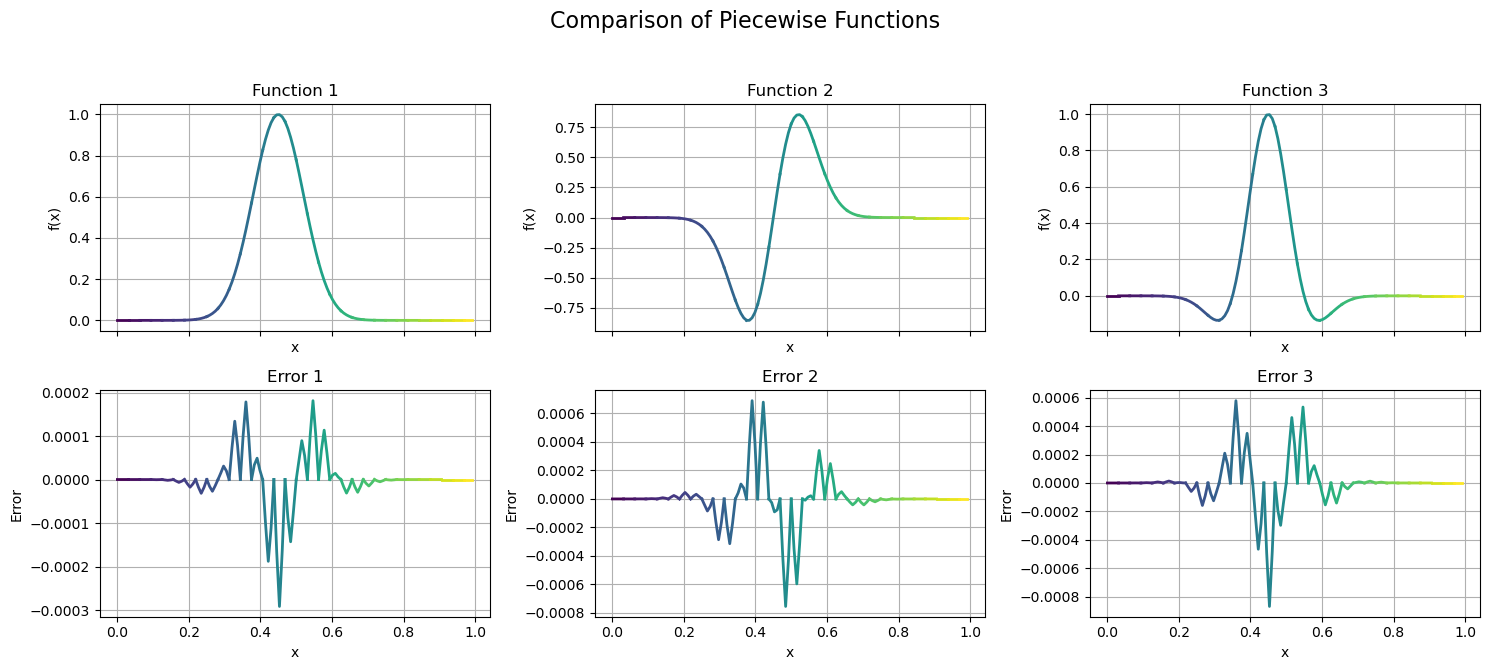

In [4]:

n = 7
N = 2**n
x = np.linspace(0, 1 - 1/N, N)

fig, ax = plt.subplots(2, 3, figsize=(15, 7),sharex=True)

# Titles for subplots
titles = ['Function 1', 'Function 2', 'Function 3']
colors = plt.cm.viridis(np.linspace(0, 1, l))  # 16 shades for curves

for idx, v in enumerate(p1):
    xi = x[idx * N // l : (idx + 1) * N // l + 1]
    ax[0][0].plot(xi, apply(v, xi), color=colors[idx], linewidth=2)
    ax[0][0].set_title(titles[0])
    ax[0][0].grid(True)

for idx, v in enumerate(p2):
    xi = x[idx * N // l : (idx + 1) * N // l + 1]
    ax[0][1].plot(xi, apply(v, xi), color=colors[idx], linewidth=2)
    ax[0][1].set_title(titles[1])
    ax[0][1].grid(True)

for idx, v in enumerate(p3):
    xi = x[idx * N // l : (idx + 1) * N // l + 1]
    ax[0][2].plot(xi, apply(v, xi), color=colors[idx], linewidth=2)
    ax[0][2].set_title(titles[2])
    ax[0][2].grid(True)

for a in ax[0]:
    a.set_xlabel('x')
    a.set_ylabel('f(x)')

titles = ['Error 1', 'Error 2', 'Error 3']

for idx, v in enumerate(p1):
    xi = x[idx * N // l : (idx + 1) * N // l + 1]
    ax[1][0].plot(xi, apply(v, xi)-f1(xi), color=colors[idx], linewidth=2)
    ax[1][0].set_title(titles[0])
    ax[1][0].grid(True)

for idx, v in enumerate(p2):
    xi = x[idx * N // l : (idx + 1) * N // l + 1]
    ax[1][1].plot(xi, apply(v, xi)-f2(xi), color=colors[idx], linewidth=2)
    ax[1][1].set_title(titles[1])
    ax[1][1].grid(True)

for idx, v in enumerate(p3):
    xi = x[idx * N // l : (idx + 1) * N // l + 1]
    ax[1][2].plot(xi, apply(v, xi)-f3(xi), color=colors[idx], linewidth=2)
    ax[1][2].set_title(titles[2])
    ax[1][2].grid(True)

for a in ax[1]:
    a.set_xlabel('x')
    a.set_ylabel('Error')

fig.suptitle('Comparison of Piecewise Functions', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('Figures/PiecewiseRep.pdf',dpi=300)
plt.show()

In [5]:
M_list1 = []
for i,p in enumerate(p1):
    reg = [i//2**_%2 for _ in range(m)[::-1]]
    M = MPS_poly(n,p,reg)
    M_list1.append(M)

M_full1 = (reduce(lambda a,b: MPS_sum(a,b),M_list1))

M_list2 = []
for i,p in enumerate(p2):
    reg = [i//2**_%2 for _ in range(m)[::-1]]
    M = MPS_poly(n,p,reg)
    M_list2.append(M)

M_full2 = (reduce(lambda a,b: MPS_sum(a,b),M_list2))

M_list3 = []
for i,p in enumerate(p3):
    reg = [i//2**_%2 for _ in range(m)[::-1]]
    M = MPS_poly(n,p,reg)
    M_list3.append(M)

M_full3 = (reduce(lambda a,b: MPS_sum(a,b),M_list3))

M_final1 = trunc_mps(M_full1,4)
M_final2 = trunc_mps(M_full2,4)
M_final3 = trunc_mps(M_full3,4)

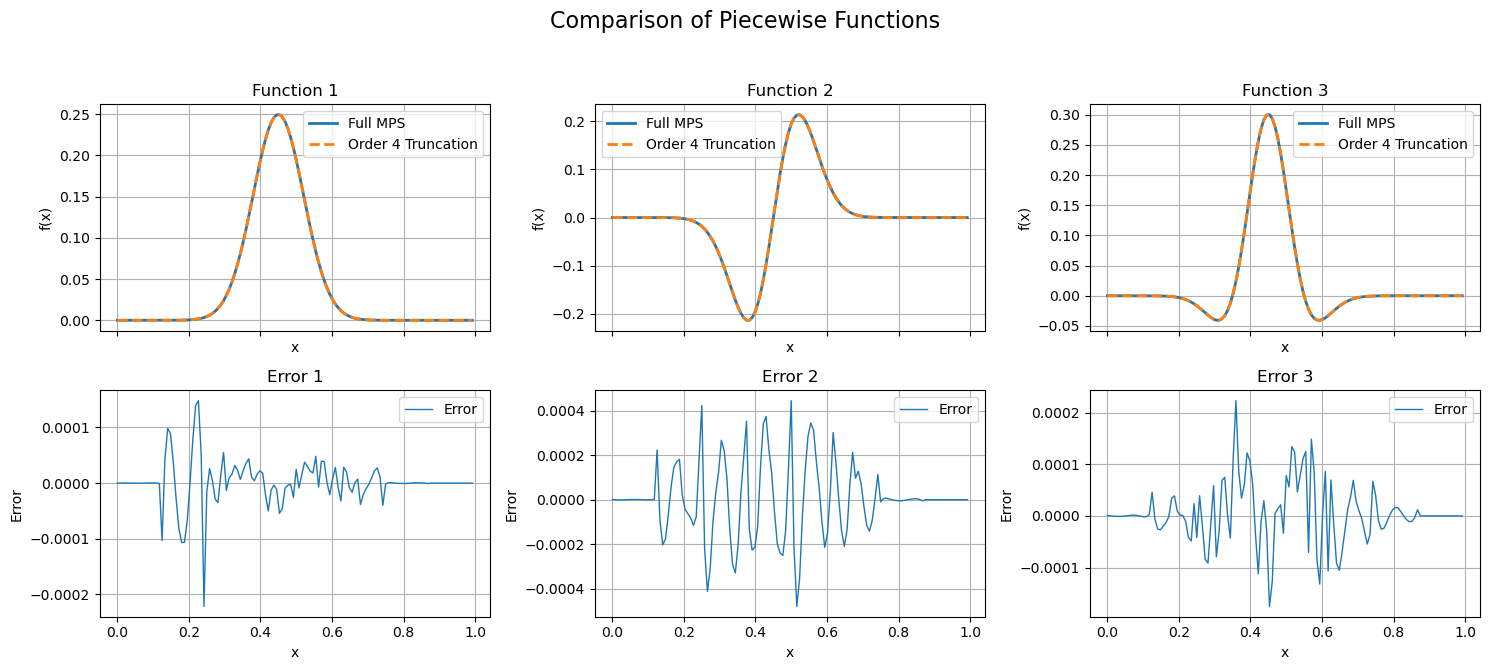

In [6]:
fig, ax = plt.subplots(2, 3, figsize=(15, 7), sharex=True)

# Titles for subplots
titles = ['Function 1', 'Function 2', 'Function 3']

# Row 0: Function comparisons
ax[0][0].plot(x, get_state(M_full1)/np.linalg.norm(get_state(M_full1)), label='Full MPS', linewidth=2)
ax[0][0].plot(x, get_state(M_final1), '--', label='Order 4 Truncation', linewidth=2)
ax[0][0].set_title(titles[0])
ax[0][0].grid(True)
ax[0][0].legend()

ax[0][1].plot(x, get_state(M_full2)/np.linalg.norm(get_state(M_full2)), label='Full MPS', linewidth=2)
ax[0][1].plot(x, get_state(M_final2), '--', label='Order 4 Truncation', linewidth=2)
ax[0][1].set_title(titles[1])
ax[0][1].grid(True)
ax[0][1].legend()

ax[0][2].plot(x, get_state(M_full3)/np.linalg.norm(get_state(M_full3)), label='Full MPS', linewidth=2)
ax[0][2].plot(x, get_state(M_final3), '--', label='Order 4 Truncation', linewidth=2)
ax[0][2].set_title(titles[2])
ax[0][2].grid(True)
ax[0][2].legend()

# Axes labels
for a in ax[0]:
    a.set_xlabel('x')
    a.set_ylabel('f(x)')

# Row 1: Error plots
titles = ['Error 1', 'Error 2', 'Error 3']

ax[1][0].plot(x, get_state(M_final1) - f1(x)/np.linalg.norm(f1(x)), label='Error', linewidth=1)
ax[1][0].set_title(titles[0])
ax[1][0].grid(True)
ax[1][0].legend()

ax[1][1].plot(x, get_state(M_final2) - f2(x)/np.linalg.norm(f2(x)), label='Error', linewidth=1)
ax[1][1].set_title(titles[1])
ax[1][1].grid(True)
ax[1][1].legend()

ax[1][2].plot(x, get_state(M_final3) - f3(x)/np.linalg.norm(f3(x)), label='Error', linewidth=1)
ax[1][2].set_title(titles[2])
ax[1][2].grid(True)
ax[1][2].legend()

# Axes labels
for a in ax[1]:
    a.set_xlabel('x')
    a.set_ylabel('Error')

fig.suptitle('Comparison of Piecewise Functions', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('Figures/MPS4Rep.pdf', dpi=300)
plt.show()

C:\Users\bik19\AppData\Local\Temp\ipykernel_18008\1471464268.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("viridis", time_steps)


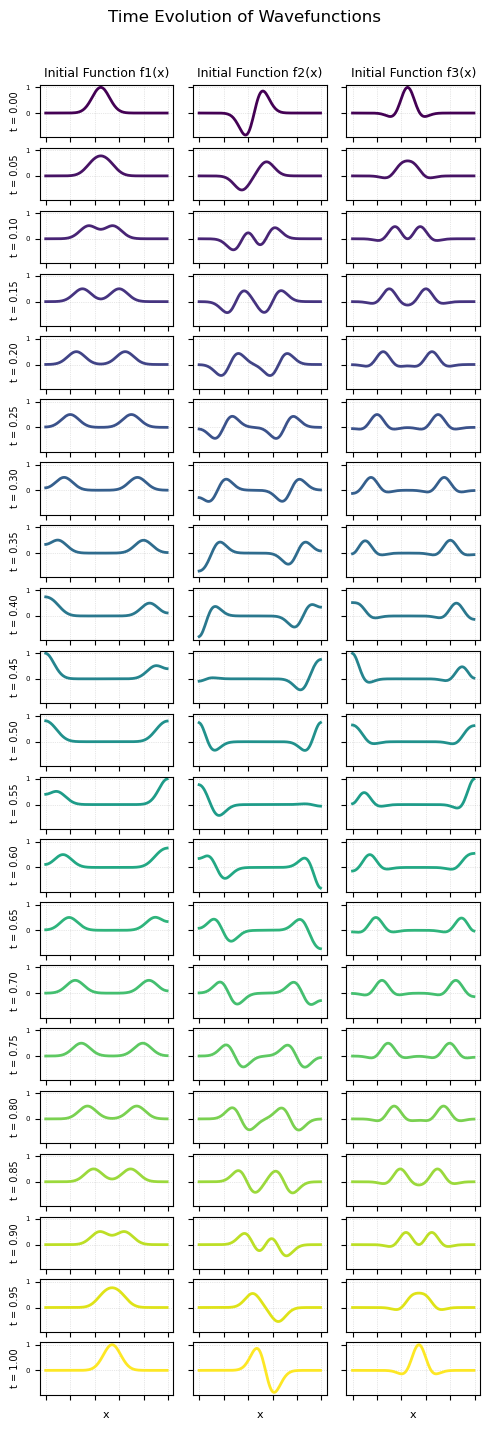

In [7]:
from scipy.linalg import expm 
from matplotlib import cm


exact_Hamiltonian = Ham_N(N)
time_steps = 21
dt = 0.05

# Reduce figure size for a more compact layout
fig, ax = plt.subplots(time_steps, 3, figsize=(5, 15), sharex=True, sharey=True)
fig.suptitle("Time Evolution of Wavefunctions", fontsize=12,y=0.95)

functions = [f1, f2, f3]
titles = ['Initial Function f1(x)', 'Initial Function f2(x)', 'Initial Function f3(x)']

# Use a colormap to emphasize time evolution
cmap = cm.get_cmap("viridis", time_steps)
colors = [cmap(i) for i in range(time_steps)]

for col in range(3):
    func = functions[col]
    initial_state = np.concatenate([func(x), np.zeros(x.shape)])
    
    for row in range(time_steps):
        t = row * dt
        evolved_state = expm(-1j * exact_Hamiltonian * t) @ initial_state
        ax[row][col].plot(x, evolved_state[:len(x)].real, color=colors[row], linewidth=2)

        # Label time on left-most column
        if col == 0:
            ax[row][col].set_ylabel(f"t = {t:.2f}", fontsize=7)
        
        # Set titles on top row
        if row == 0:
            ax[row][col].set_title(titles[col], fontsize=9)

        ax[row][col].tick_params(labelsize=5)  # Smaller tick labels
        ax[row][col].grid(True, linestyle=':', linewidth=0.5, alpha=0.6)

# Hide x-axis labels on all but last row
for row in range(time_steps - 1):
    for col in range(3):
        ax[row][col].set_xticklabels([])

# Set a common x-axis label
for col in range(3):
    ax[-1][col].set_xlabel("x", fontsize=8)

# Adjust layout to reduce space
plt.tight_layout()
plt.subplots_adjust(hspace=0.2, top=0.9)  # Reduced hspace for a more compact layout
plt.savefig("Figures/ExactEvolution.pdf",dpi=300)
plt.show()

#### Circuit Implementation ####

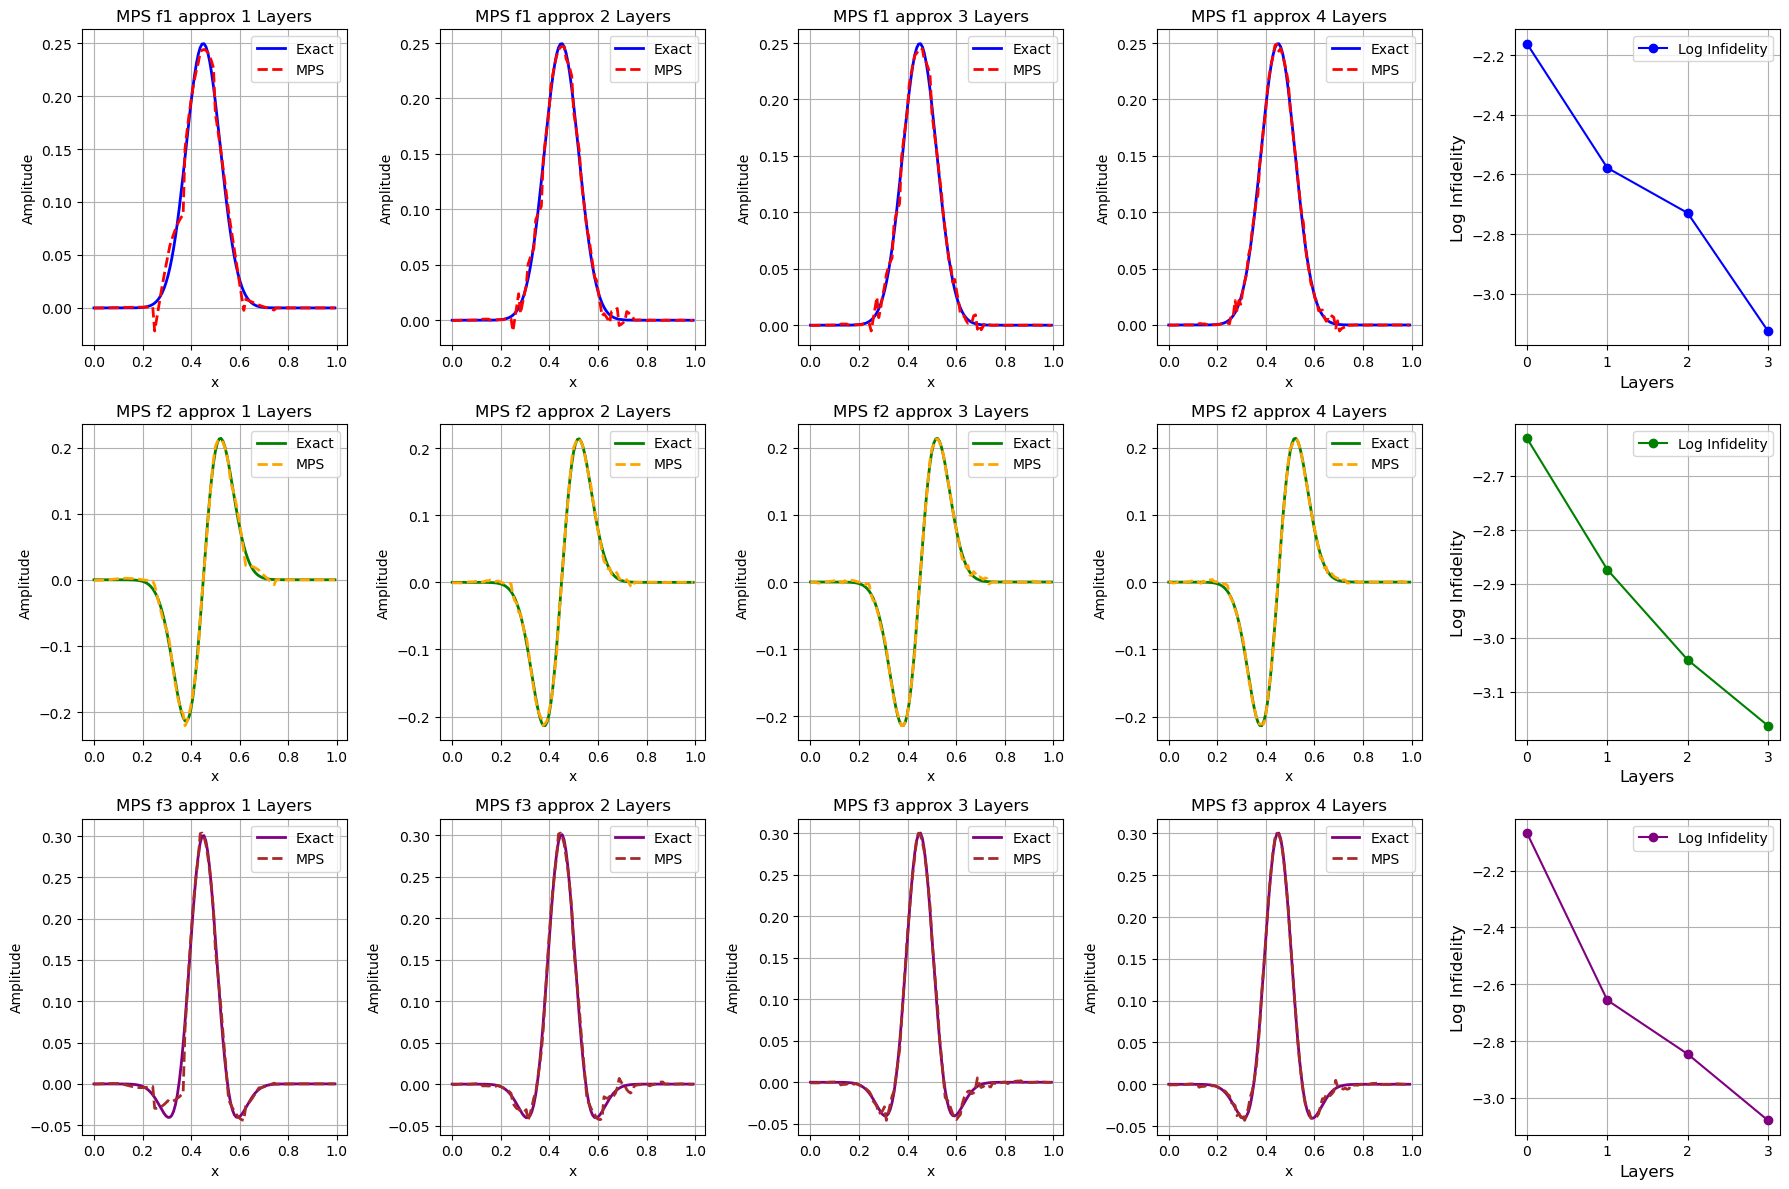

In [8]:
from qiskit.quantum_info import Statevector
fig, ax = plt.subplots(3, 5, figsize=(18, 12))  # Larger figure for better clarity

# Customizing plot appearance
inner1 = []
inner2 = []
inner3 = []
for i in range(4):
    # First row (f1)
    ax[0][i].plot(x, f1(x) / np.linalg.norm(f1(x)), label='Exact', color='b', linewidth=2)
    ax[0][i].plot(x, Statevector(circ_from_mps(M_final1, i + 1).reverse_bits()).data.real, '--', label='MPS', color='r', linewidth=2)
    inner1.append(1 - Statevector(circ_from_mps(M_final1, i + 1).reverse_bits()).data.real.dot(f1(x) / np.linalg.norm(f1(x)))**2)
    ax[0][i].set_title(f"MPS f1 approx {i+1} Layers")
    ax[0][i].set_xlabel('x')
    ax[0][i].set_ylabel('Amplitude')
    ax[0][i].grid(True)
    ax[0][i].legend(loc='upper right', fontsize=10)

    # Second row (f2)
    ax[1][i].plot(x, f2(x) / np.linalg.norm(f2(x)), label='Exact', color='g', linewidth=2)
    ax[1][i].plot(x, Statevector(circ_from_mps(M_final2, i + 1).reverse_bits()).data.real, '--', label='MPS', color='orange', linewidth=2)
    inner2.append(1 - Statevector(circ_from_mps(M_final2, i + 1).reverse_bits()).data.real.dot(f2(x) / np.linalg.norm(f2(x)))**2)
    ax[1][i].set_title(f"MPS f2 approx {i+1} Layers")
    ax[1][i].set_xlabel('x')
    ax[1][i].set_ylabel('Amplitude')
    ax[1][i].grid(True)
    ax[1][i].legend(loc='upper right', fontsize=10)

    # Third row (f3)
    ax[2][i].plot(x, f3(x) / np.linalg.norm(f3(x)), label='Exact', color='purple', linewidth=2)
    ax[2][i].plot(x, Statevector(circ_from_mps(M_final3, i + 1).reverse_bits()).data.real, '--', label='MPS', color='brown', linewidth=2)
    inner3.append(1 - Statevector(circ_from_mps(M_final3, i + 1).reverse_bits()).data.real.dot(f3(x) / np.linalg.norm(f3(x)))**2)
    ax[2][i].set_title(f"MPS f3 approx {i+1} Layers")
    ax[2][i].set_xlabel('x')
    ax[2][i].set_ylabel('Amplitude')
    ax[2][i].grid(True)
    ax[2][i].legend(loc='upper right', fontsize=10)

# Log Infidelity plots for each row
ax[0][4].plot(np.log10(np.abs(inner1)), '-o', color='b', markersize=6, label='Log Infidelity')
ax[0][4].set_xlabel('Layers', fontsize=12)
ax[0][4].set_ylabel('Log Infidelity', fontsize=12)
ax[0][4].grid(True)
ax[0][4].legend(fontsize=10)

ax[1][4].plot(np.log10(np.abs(inner2)), '-o', color='g', markersize=6, label='Log Infidelity')
ax[1][4].set_xlabel('Layers', fontsize=12)
ax[1][4].set_ylabel('Log Infidelity', fontsize=12)
ax[1][4].grid(True)
ax[1][4].legend(fontsize=10)

ax[2][4].plot(np.log10(np.abs(inner3)), '-o', color='purple', markersize=6, label='Log Infidelity')
ax[2][4].set_xlabel('Layers', fontsize=12)
ax[2][4].set_ylabel('Log Infidelity', fontsize=12)
ax[2][4].grid(True)
ax[2][4].legend(fontsize=10)

# Adjust layout to prevent overlap
plt.tight_layout()

plt.savefig("Figures/Initializations.pdf",dpi=300)
# Show the plot
plt.show()

In [9]:
P_circ(n+1).draw(fold=-1,justify='right')

┌───┐┌─────────┐                                                                                                                 ┌───┐┌─────────┐┌───┐┌──────────┐
q_0: ┤ Z ├┤ P(-π/2) ├─────■──────────■───────────■───────────■────────────■────────────■────────■────■────■────■────■────■────■────■──┤ H ├┤ Ry(π/4) ├┤ X ├┤ Ry(-π/4) ├
     └───┘├─────────┤   ┌─┴─┐        │           │           │            │            │        │  ┌─┴─┐  │    │    │    │    │    │  └───┘└──┬───┬──┘└─┬─┘└──┬───┬───┘
q_1: ─────┤ P(-π/4) ├───┤ X ├────────┼───────────┼───────────┼────────────┼────────────┼────────┼──┤ X ├──┼────┼────┼────┼────┼────┼──────────┤ X ├─────■─────┤ X ├────
          └─────────┘┌──┴───┴──┐   ┌─┴─┐         │           │            │            │        │  └─┬─┘┌─┴─┐  │    │    │    │    │          ├───┤     │     ├───┤    
q_2: ────────────────┤ P(-π/8) ├───┤ X ├─────────┼───────────┼────────────┼────────────┼────────┼────■──┤ X ├──┼────┼────┼────┼────┼──────────┤ X ├─────■─────┤ X ├────
                     └─────────┘┌──┴───┴───┐   ┌─┴─┐         │            │            │        │    │  └─┬─┘┌─┴─┐  │    │    │    │          ├───┤     │     ├───┤    
q_3: ───────────────────────────┤ P(-π/16) ├───┤ X ├─────────┼────────────┼────────────┼────────┼────■────■──┤ X ├──┼────┼────┼────┼──────────┤ X ├─────■─────┤ X ├────
                                └──────────┘┌──┴───┴───┐   ┌─┴─┐          │            │        │    │    │  └─┬─┘┌─┴─┐  │    │    │          ├───┤     │     ├───┤    
q_4: ───────────────────────────────────────┤ P(-π/32) ├───┤ X ├──────────┼────────────┼────────┼────■────■────■──┤ X ├──┼────┼────┼──────────┤ X ├─────■─────┤ X ├────
                                            └──────────┘┌──┴───┴───┐    ┌─┴─┐          │        │    │    │    │  └─┬─┘┌─┴─┐  │    │          ├───┤     │     ├───┤    
q_5: ───────────────────────────────────────────────────┤ P(-π/64) ├────┤ X ├──────────┼────────┼────■────■────■────■──┤ X ├──┼────┼──────────┤ X ├─────■─────┤ X ├────
                                                        └──────────┘┌───┴───┴───┐    ┌─┴─┐      │    │    │    │    │  └─┬─┘┌─┴─┐  │          ├───┤     │     ├───┤    
q_6: ───────────────────────────────────────────────────────────────┤ P(-π/128) ├────┤ X ├──────┼────■────■────■────■────■──┤ X ├──┼──────────┤ X ├─────■─────┤ X ├────
                                                                    └───────────┘┌───┴───┴───┐┌─┴─┐  │    │    │    │    │  └─┬─┘┌─┴─┐        ├───┤     │     ├───┤    
q_7: ────────────────────────────────────────────────────────────────────────────┤ P(-π/256) ├┤ X ├──■────■────■────■────■────■──┤ X ├────────┤ X ├─────■─────┤ X ├────
                                                                                 └───────────┘└───┘                              └───┘        └───┘           └───┘

In [10]:
Q_circ(n+1).draw(fold=-1)

┌───┐                                   
q_0: ┤ H ├──■────■────■────■────■────■────■──
     └───┘┌─┴─┐  │    │    │    │    │    │  
q_1: ─────┤ X ├──┼────┼────┼────┼────┼────┼──
          └───┘┌─┴─┐  │    │    │    │    │  
q_2: ──────────┤ X ├──┼────┼────┼────┼────┼──
               └───┘┌─┴─┐  │    │    │    │  
q_3: ───────────────┤ X ├──┼────┼────┼────┼──
                    └───┘┌─┴─┐  │    │    │  
q_4: ────────────────────┤ X ├──┼────┼────┼──
                         └───┘┌─┴─┐  │    │  
q_5: ─────────────────────────┤ X ├──┼────┼──
                              └───┘┌─┴─┐  │  
q_6: ──────────────────────────────┤ X ├──┼──
                                   └───┘┌─┴─┐
q_7: ───────────────────────────────────┤ X ├
                                        └───┘

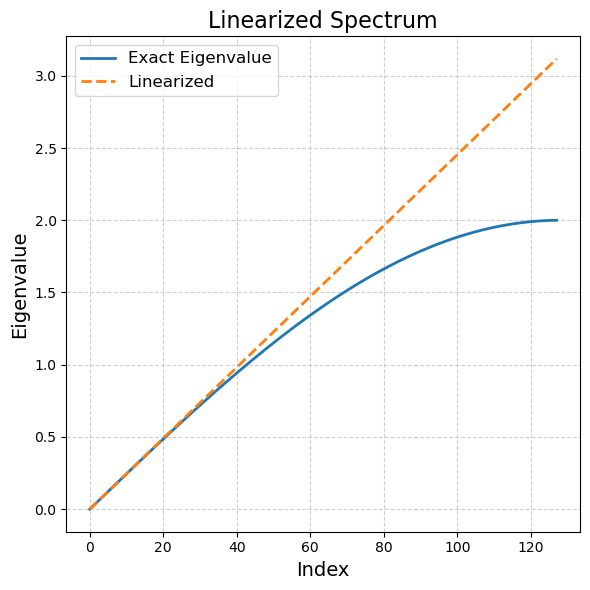

In [11]:
N = 2**7
plt.figure(figsize=(6, 6))

plt.plot(np.sqrt(-spectrum_N(N)), label='Exact Eigenvalue', linewidth=2, color='tab:blue')
plt.plot(linear_spectrum_N(N), label='Linearized', linewidth=2, linestyle='--', color='tab:orange')

plt.title('Linearized Spectrum', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Eigenvalue', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('Figures/Eigenvalues.pdf',dpi=300)
plt.show()

In [12]:
from qiskit.circuit import Parameter
t= Parameter('t')
evo_circ  = evolve_circ(n,t)
evo_circ.draw(fold=-1)

┌───────────────┐                                                                                             ┌───────────────┐
q_0: ┤0              ├─────────────────────────────────────────────────────────────────────────────────────────────┤0              ├
     │               │    ┌───┐                                                                               ┌───┐│               │
q_1: ┤               ├────┤ H ├─────■───────────■──────────■──────────■──────────■─────────■─────────■────────┤ H ├┤               ├
     │               │┌───┴───┴───┐ │P(128π*t)  │          │          │          │         │         │        └───┘│               │
q_2: ┤1              ├┤ P(-64π*t) ├─■───────────┼──────────┼──────────┼──────────┼─────────┼─────────┼─────────────┤1              ├
     │               │├───────────┤             │P(64π*t)  │          │          │         │         │             │               │
q_3: ┤2              ├┤ P(-32π*t) ├─────────────■──────────┼──────────┼──────────┼─────────┼─────────┼─────────────┤2              ├
     │               │├───────────┤                        │P(32π*t)  │          │         │         │             │               │
q_4: ┤3 circuit-1624 ├┤ P(-16π*t) ├────────────────────────■──────────┼──────────┼─────────┼─────────┼─────────────┤3 circuit-1636 ├
     │               │└┬──────────┤                                   │P(16π*t)  │         │         │             │               │
q_5: ┤4              ├─┤ P(-8π*t) ├───────────────────────────────────■──────────┼─────────┼─────────┼─────────────┤4              ├
     │               │ ├──────────┤                                              │P(8π*t)  │         │             │               │
q_6: ┤5              ├─┤ P(-4π*t) ├──────────────────────────────────────────────■─────────┼─────────┼─────────────┤5              ├
     │               │ ├──────────┤                                                        │P(4π*t)  │             │               │
q_7: ┤6              ├─┤ P(-2π*t) ├────────────────────────────────────────────────────────■─────────┼─────────────┤6              ├
     │               │ ├─────────┬┘                                                                  │P(2π*t)      │               │
q_8: ┤7              ├─┤ P(-π*t) ├───────────────────────────────────────────────────────────────────■─────────────┤7              ├
     └───────────────┘ └─────────┘                                                                                 └───────────────┘

In [13]:
M1_evo_circ = QuantumCircuit(n+2)
M1_evo_circ.append(circ_from_mps(M_final1,4),range(2,n+2))
M1_evo_circ.append(evolve_circ(n,t),range(0,n+2))

M2_evo_circ = QuantumCircuit(n+2)
M2_evo_circ.append(circ_from_mps(M_final2,4),range(2,n+2))
M2_evo_circ.append(evolve_circ(n,t),range(0,n+2))

M3_evo_circ = QuantumCircuit(n+2)
M3_evo_circ.append(circ_from_mps(M_final3,4),range(2,n+2))
M3_evo_circ.append(evolve_circ(n,t),range(0,n+2))

circs = [M1_evo_circ,M2_evo_circ,M3_evo_circ]

C:\Users\bik19\AppData\Local\Temp\ipykernel_18008\4053874896.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("viridis", time_steps)
C:\Users\bik19\AppData\Local\Temp\ipykernel_18008\4053874896.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap1 = cm.get_cmap("cool", time_steps)


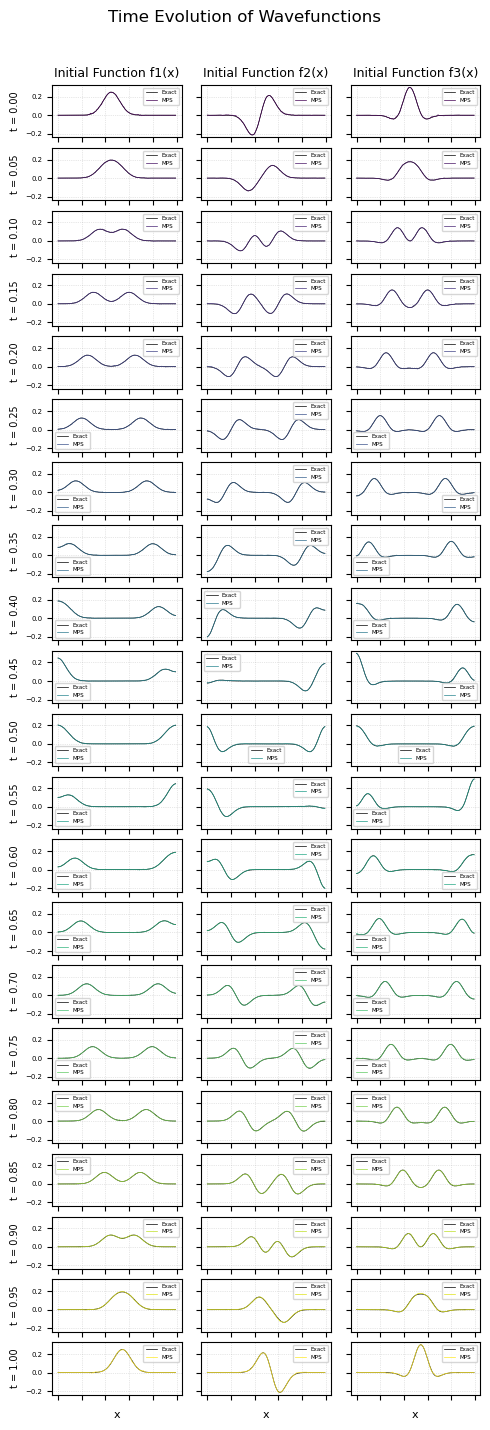

In [14]:

exact_Hamiltonian = Ham_N(N)
time_steps = 21
dt = 0.05

exact_data = np.zeros((time_steps,3,2*len(x)),dtype=complex)
circuit_data = np.zeros((time_steps,3,2*len(x)),dtype=complex)
# Reduce figure size for a more compact layout
fig, ax = plt.subplots(time_steps, 3, figsize=(5, 15), sharex=True, sharey=True)
fig.suptitle("Time Evolution of Wavefunctions", fontsize=12,y=0.95)

functions = [f1, f2, f3]
titles = ['Initial Function f1(x)', 'Initial Function f2(x)', 'Initial Function f3(x)']

# Use a colormap to emphasize time evolution
cmap = cm.get_cmap("viridis", time_steps)
colors = [cmap(i) for i in range(time_steps)]

cmap1 = cm.get_cmap("cool", time_steps)
colors1 = [cmap1(i) for i in range(time_steps)]

for col in range(3):
    func = functions[col]
    initial_state = np.concatenate([func(x)/np.linalg.norm(func(x)), np.zeros(x.shape)])
    
    for row in range(time_steps):
        t = row * dt
        evolved_state = expm(-1j * exact_Hamiltonian * t) @ initial_state
        ax[row][col].plot(x, evolved_state[:len(x)].real,color='k',linewidth=0.5,label='Exact')
        ax[row][col].plot(x, Statevector(circs[col].assign_parameters([t]).reverse_bits()).data.real[:len(x)],color=colors[row],linewidth=0.5,label='MPS')
        ax[row][col].legend(fontsize=4)
        
        exact_data[row,col,:] = evolved_state
        circuit_data[row,col,:] = Statevector(circs[col].assign_parameters([t]).reverse_bits()).data[:2*len(x)]
        
        # Label time on left-most column
        if col == 0:
            ax[row][col].set_ylabel(f"t = {t:.2f}", fontsize=7)
        
        # Set titles on top row
        if row == 0:
            ax[row][col].set_title(titles[col], fontsize=9)

        ax[row][col].tick_params(labelsize=5)  # Smaller tick labels
        ax[row][col].grid(True, linestyle=':', linewidth=0.5, alpha=0.6)

# Hide x-axis labels on all but last row
for row in range(time_steps - 1):
    for col in range(3):
        ax[row][col].set_xticklabels([])

# Set a common x-axis label
for col in range(3):
    ax[-1][col].set_xlabel("x", fontsize=8)

# Adjust layout to reduce space
plt.tight_layout()
plt.subplots_adjust(hspace=0.2, top=0.9)  # Reduced hspace for a more compact layout
plt.savefig("Figures/MPSExactEvolution.pdf",dpi=300)
plt.show()

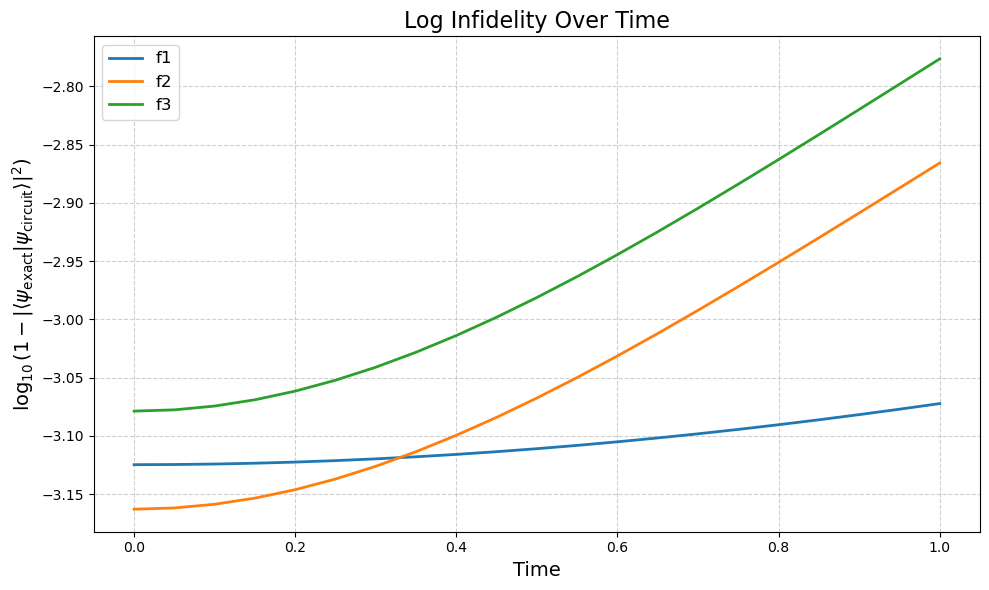

In [15]:

time = np.array(range(time_steps)) * dt
log_infidelities = [
    [np.log10(1 - abs(circuit_data[t, i, :].conjugate() @ exact_data[t, i, :])**2) for t in range(time_steps)]
    for i in range(3)
]

plt.figure(figsize=(10, 6))

colors = ['tab:blue', 'tab:orange', 'tab:green']
labels = ['f1', 'f2', 'f3']

for i in range(3):
    plt.plot(time, log_infidelities[i], label=labels[i], color=colors[i], linewidth=2)

plt.xlabel('Time', fontsize=14)
plt.ylabel(r'$\log_{10}(1 - |\langle \psi_{\mathrm{exact}} | \psi_{\mathrm{circuit}} \rangle|^2)$', fontsize=14)
plt.title('Log Infidelity Over Time', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig("Figures/InfidelityPlot.pdf",dpi=300)
plt.show()